<a href="https://colab.research.google.com/github/CurryLay/Machine-Learning/blob/main/EEME30002_CNN_MNIST_vStudent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN for digit classification


## Dataset description

We are going to use the [MNIST](https://paperswithcode.com/dataset/mnist) dataset to implement a CNN for multiclass classification. This dataset consists of a series of images with handwritten digits from 0 to 9. In total, there are 60,000 examples for the training set and 10,000 for the test set. The images are in gray-scale and have a size of 28x28 pixels. All images are centred around the centre of mass of each handwritten number.

Our **objective** is to build a CNN model that is capable of classifying the input images into numbers from 0 to 9.

## Import packages

The first thing we do is to load the packages that we are going to use throughout the Jupyter Notebook. These are Numpy, Matplotlib (pyplot), and Tensorflow. From the latter, we will import keras, layers and mnist so we do not have to write the full direction - e.g. "tf.keras.layers...".

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

## Load dataset

We first load and unpack the dataset into training and testing datasets with the corresponding labels (i.e. the number the image corresponds to).

In [4]:
(train_data_, train_labels_), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Let's plot one of the examples of the test data. Choosing a random sample we obtain the following:

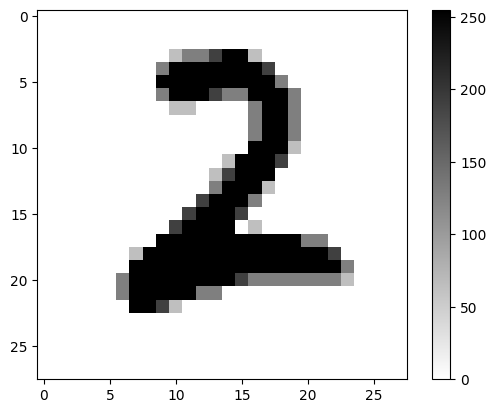

In [5]:
plt.figure()
plt.imshow(test_data[5475,:,:], cmap='gray_r')
plt.colorbar()
plt.show()

In [7]:
print(test_labels[5475])

2


If you want to make sure what is the shape of the dataset, you can query that as follows (this will be informative for building the model later on):

In [8]:
input_shape = list(train_data_.shape[1:])+[1] # (28, 28, 1)
print(input_shape)

[28, 28, 1]


## Split and prepare the data

We are going to slightly modify the MNIST dataset. Originally there is no train-validation split in the dataset structure. However, we can implement this so we have a more independent way to ensure the convergence of the model.

In [20]:
p = np.random.permutation(len(train_data_))
train_data_ = train_data_[p]
train_labels_ = train_labels_[p]

N_train = train_data_.shape[0]
N_valid = int(N_train/4)
N_train_new = N_train - N_valid

train_data = train_data_.reshape(train_data_.shape[0], 28, 28, 1)[:N_train_new]
valid_data = train_data_.reshape(train_data_.shape[0], 28, 28, 1)[N_train_new:]
train_labels = train_labels_[:N_train_new]
valid_labels = train_labels_[N_train_new:]

test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)

train_data = train_data.astype('float32')
valid_data = valid_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255
valid_data /= 255
test_data /= 255

In [21]:
p

array([14715,  6480,  3805, ..., 33024, 25006, 37497])

To ensure that all, training, validation, and test sets have an even distribution of data for all the classes (i.e. balanced classes) we can plot that as follows:


*   What function should we use to this end?



Text(0.5, 0, 'Test labels')

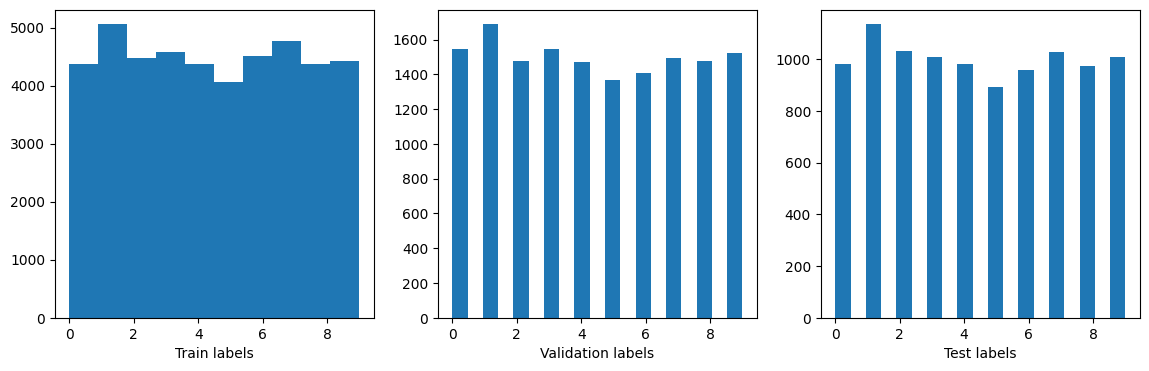

In [23]:
#num_classes = len(set(train_labels))
fig,ax=plt.subplots(1,3,figsize=(14,4))

#ax[0].hist(train_labels,bins=np.arange(num_classes+1)-0.5,edgecolor='black')
ax[0].hist(train_labels,bins=10)
ax[0].set_xlabel('Train labels')

#ax[1].hist(valid_labels,bins=np.arange(num_classes+1)-0.5,edgecolor='black')
ax[1].hist(valid_labels,bins=19)
ax[1].set_xlabel('Validation labels')

#ax[2].hist(test_labels,bins=np.arange(num_classes+1)-0.5,edgecolor='black')
ax[2].hist(test_labels,bins=19)
ax[2].set_xlabel('Test labels')

## CNN model definition

Let's define our CNN model. Take some time to think about the structure of the model and what we can use to have a good model that predicts the class of each image.

In [24]:
model = keras.models.Sequential()
model.add(layers.Input(input_shape))
model.add(layers.Conv2D(12,kernel_size=(3,3),activation='relu'))# Input layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))# downsizing images
model.add(layers.Conv2D(28,kernel_size=(3,3),activation='relu'))# Input layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))# downsizing images
model.add(layers.Flatten()) # image are 3d so have to flatten them into a (1 x 700) vector
model.add(layers.Dense(128, activation='relu'))# adding a Dense layer of 128 neurons with relu
model.add(layers.Dropout(0.5))#Implementing dropout regularization with p = 0.5
model.add(layers.Dense(20, activation='relu'))# adding a Dense layer of 20 neurons with relu
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,activation='softmax')) # adding an output layer (with 10 possible outputs for the 10 digits we need to predict)

What type of loss function we should use to ensure good classification performance?

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['Accuracy'])

Finally, we can visualise the model structure with the extension *.summary()*

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 12)          │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 28)          │           3,052 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 28)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 700)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          89,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           2,580 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,690 (373.79 KB)

 Trainable params: 95,690 (373.79 KB)

 Non-trainable params: 0 (0.00 B)

## Training the model

The next step will be to train the model. First we have to define the number of epochs and the batch size. Then we will specify the .fit() function so we obtain information about the training and validation performance.

Note the two callbacks that have been specified:
* What are they for?
* How do they work?

In [27]:
# Set up some params
nb_epoch = 10     # number of epochs to train on
batch_size = 50  # training batch size

In [28]:
# perform training ...
#   - call the main training loop in keras for our network+dataset
filepath = 'convmodrecnets_CNN2_0.5.wts.keras'
history = model.fit(train_data,
    train_labels,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=1,
    validation_data=(valid_data, valid_labels),
    callbacks = [
        tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='auto')
    ])
# we re-load the best weights once training is finished
model.load_weights(filepath)

Epoch 1/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - Accuracy: 0.5352 - loss: 1.3046 - val_Accuracy: 0.9613 - val_loss: 0.1524
Epoch 2/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Accuracy: 0.8574 - loss: 0.4462 - val_Accuracy: 0.9717 - val_loss: 0.1044
Epoch 3/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.8924 - loss: 0.3427 - val_Accuracy: 0.9799 - val_loss: 0.0835
Epoch 4/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Accuracy: 0.9063 - loss: 0.2972 - val_Accuracy: 0.9794 - val_loss: 0.0811
Epoch 5/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Accuracy: 0.9171 - loss: 0.2674 - val_Accuracy: 0.9815 - val_loss: 0.0790
Epoch 6/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Accuracy: 0.9210 - loss: 0.2513 - val_Accuracy: 0.9800 - val_loss: 0.0846
Epoch 7/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Accuracy: 0.9277 - loss: 0.2324 - val_Accuracy: 0.9847 - val_loss: 0.0683
Epoch 8/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.9274 - loss: 0.2236 - val_Accuracy: 0

## Plotting section

We start by plotting the history curves. We can image the losses and metrics that were specified in the compile function, for both validation and training sets.

* Why have we used log-log scale?
* Why is the validation curve above the training curve (for accuracy)?

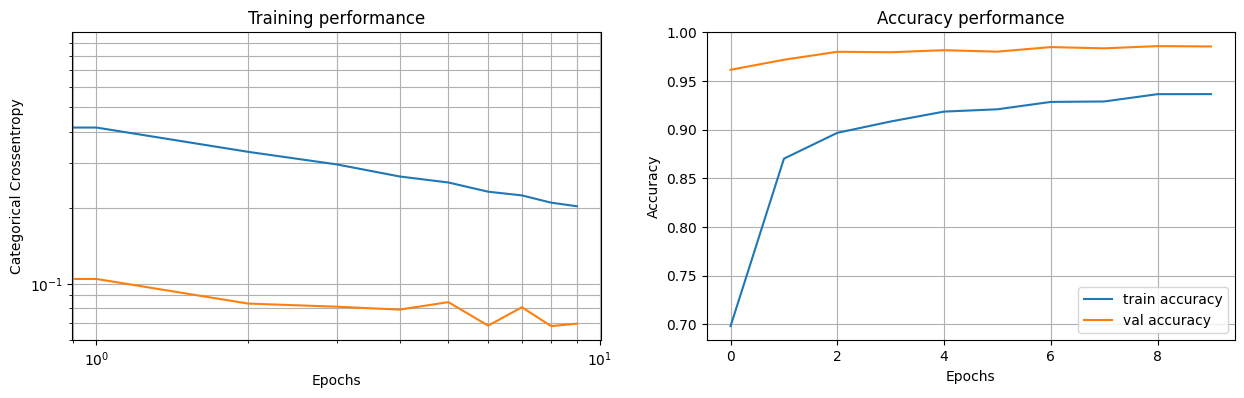

In [29]:
# Show loss curves
fig,ax=plt.subplots(1,2,figsize=(15,4))
ax[0].set_title('Training performance')
ax[0].plot(history.epoch, history.history['loss'], label='train loss error')
ax[0].plot(history.epoch, history.history['val_loss'], label='val_error')
ax[0].grid(which='minor')
ax[0].grid(which='major')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Categorical Crossentropy')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_title('Accuracy performance')
ax[1].plot(history.epoch, history.history['Accuracy'], label='train accuracy')
ax[1].plot(history.epoch, history.history['val_Accuracy'], label='val accuracy')
ax[1].grid()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
plt.legend()

### Classification performance evaluation

To check how the model is performing for each class, we can use a tool called confusion matrix. This tool lets us visualise the frequency of the model in classifying the data in their corresponding class.

We first define a function that will plot the matrix.

In [30]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Reds, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Now, we calculate the matrix that will be plotted with the matrix above.

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


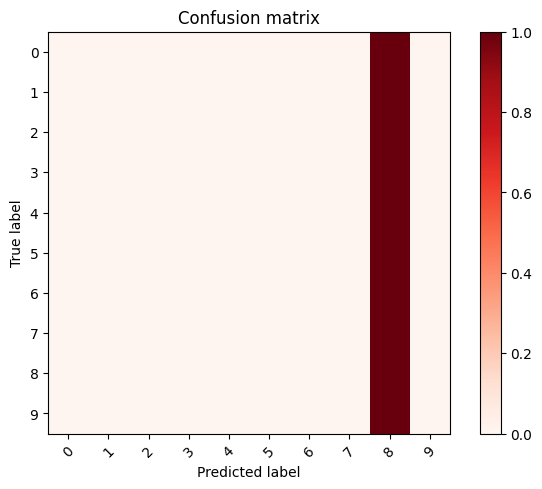

In [32]:
# Plot confusion matrix
classes = np.unique(train_labels)
test_Y_hat = model.predict(test_data, batch_size=batch_size)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,test_data.shape[0]):
    j = test_labels[i]
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)

## Model prediction

The last part of this notebook shows how you can use the model for prediction. It also shows how to image both the input data and the output data from the model, as well as the .evaluate() function.

tf.Tensor(
[[0.06577266 0.0489062  0.0789324  0.09461964 0.08088025 0.05559117
  0.04224773 0.08532288 0.31748906 0.13023804]], shape=(1, 10), dtype=float32)


(0.0, 1.0)

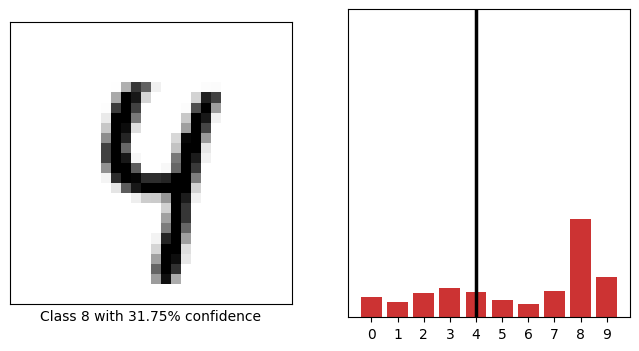

In [33]:
# Model prediction
test_no = 198
test_Y_hat0 = model(test_data[test_no:test_no+1])
print(test_Y_hat0)
fig,ax=plt.subplots(1,2,figsize=(8,4))
im=ax[0].imshow(test_data[test_no,:,:], cmap='gray_r')
ax[0].set_xlabel('Class {} with {:.2f}% confidence'.format(np.argmax(test_Y_hat0),100*np.max(test_Y_hat0)))
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].bar(range(0,10),test_Y_hat0[0],color=[.8,.2,.2])
ax[1].axvline(test_labels[test_no],linestyle='-',linewidth=2.5,color='black')
ax[1].set_xticks(range(0,10),range(0,10))
ax[1].set_yticks([])
ax[1].set_ylim(0,1)

In [34]:
loss_eval, acc_eval = model.evaluate(test_data, test_labels, batch_size=120)

84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.0945 - loss: 2.4900


# Homework

As an open homework activity, try the following things (related to hyperparameter optimisation) to improve the model performance:

* Increase the number of epochs;
* Modify the model architecture and layers definition;
 * Compare with more and less convolutional layers;
 * Compare with a FCNN alone - what benefits does the CNN bring?
* Document your process and create a figure where you show your different configurations and the overall accuracy in the test dataset - which configuration achieved the best performance?
  * Upload your results to the Coding Padlet (https://uob.padlet.org/sergiocanterochinchilla/eeme30002-coding-padlet-f7rkivao921fjqet)
  * Comment on your colleagues' results